## Madoria's Journal
### Importing the Data and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, classification_report
#from shapely.geometry import Point, Polygon
#import geopandas as gpd

In [2]:
testing = pd.read_csv('data/Test data.csv')
training = pd.read_csv('data/Training data.csv')
target = pd.read_csv('data/Training data target.csv')

In [3]:
testing.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


In [4]:
training.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
target.head(1)

,id,status_group
0,69572,functional


We decided to split the dataset in the beginning and we all did a basic analysis on our own columns.\
Here I begin analyzing the columns that I was assigned:

In [6]:
df= training[['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   basin           59400 non-null  object
 1   subvillage      59029 non-null  object
 2   region          59400 non-null  object
 3   region_code     59400 non-null  int64 
 4   district_code   59400 non-null  int64 
 5   lga             59400 non-null  object
 6   ward            59400 non-null  object
 7   population      59400 non-null  int64 
 8   public_meeting  56066 non-null  object
 9   recorded_by     59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='basin', ylabel='count'>

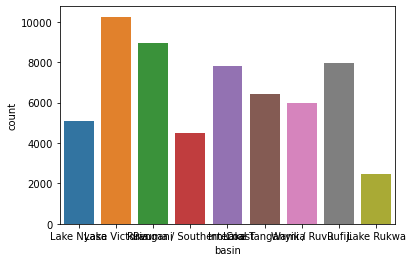

In [7]:
df['basin'].value_counts()
sns.countplot(x=df['basin'])

<AxesSubplot:xlabel='subvillage', ylabel='population'>

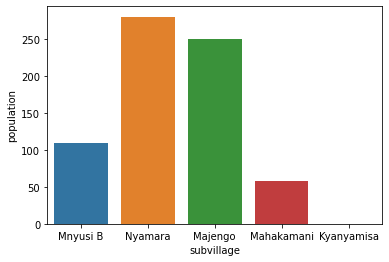

In [8]:
df['subvillage'].value_counts()
sns.barplot(x=df['subvillage'][:5], y=df['population'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='region'>

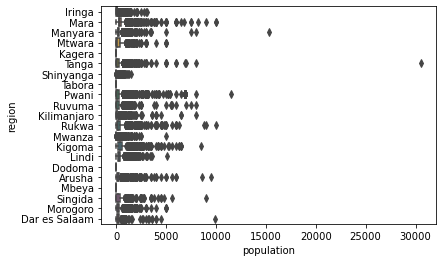

In [9]:
df['region'].value_counts()
sns.boxplot(df['population'], df['region'])

<AxesSubplot:xlabel='region_code', ylabel='count'>

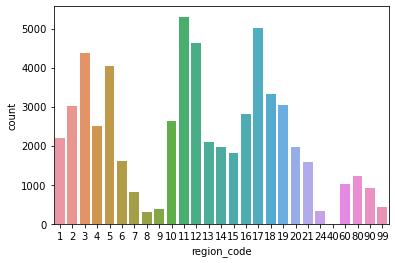

In [10]:
df['region_code'].value_counts()
sns.countplot(x=df['region_code'])

<AxesSubplot:xlabel='district_code', ylabel='count'>

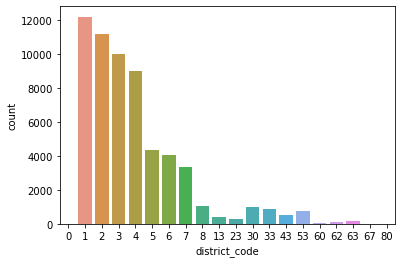

In [11]:
df['district_code'].value_counts()
sns.countplot(x=df['district_code'])

C:\Users\deaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='lga'>

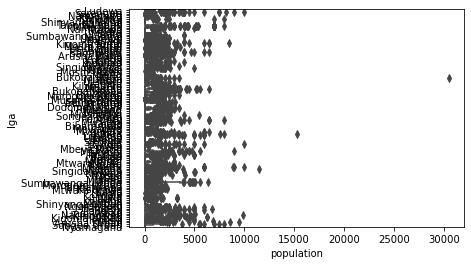

In [12]:
#Yikes
sns.boxplot(df['population'], df['lga'])

In [13]:
df['ward'].value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

In [14]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

<AxesSubplot:xlabel='public_meeting', ylabel='count'>

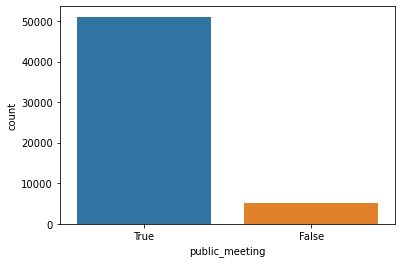

In [15]:
df['public_meeting'].value_counts()
sns.countplot(x=df['public_meeting'])

<AxesSubplot:xlabel='recorded_by', ylabel='count'>

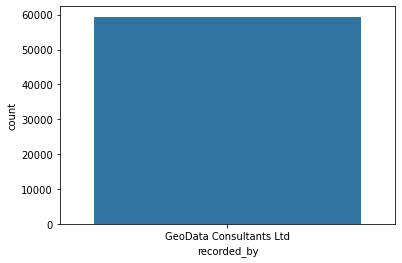

In [16]:
df['recorded_by'].value_counts()
sns.countplot(x=df['recorded_by'])

Now moving on to adding at least one map visual.

In [17]:
df2 = pd.concat([training, target], axis=1)

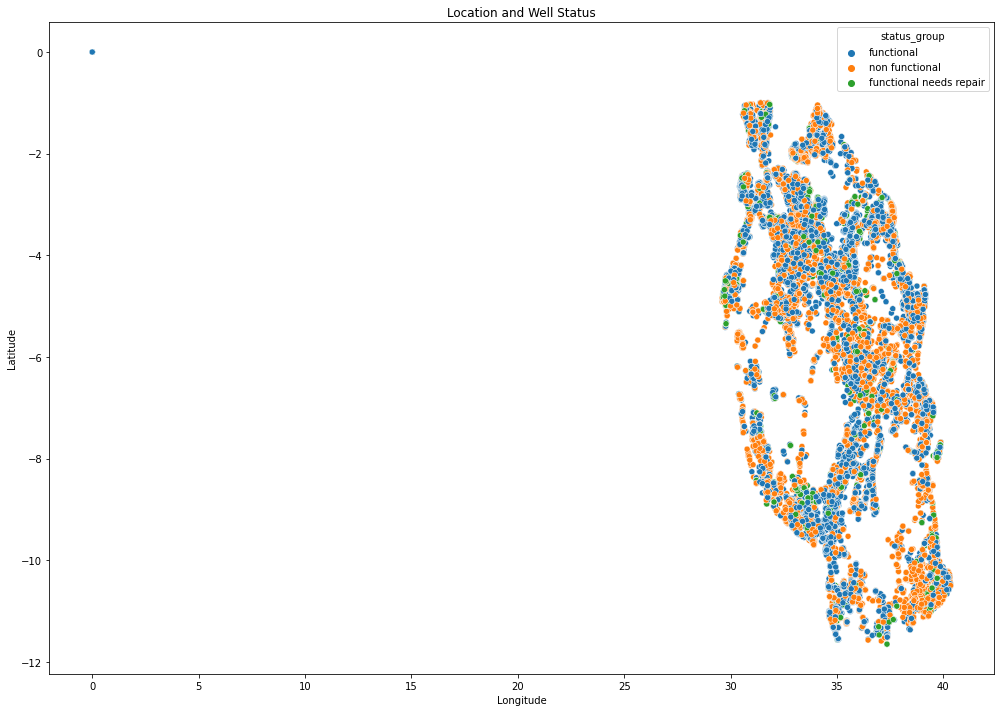

In [18]:
plt.figure(figsize=(14, 10))
plt.title('Location and Well Status')
sns.scatterplot(x= df2['longitude'], y= df2['latitude'], hue=df2['status_group'])#, palette='RdBu', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('well_map.png', format='png', transparent=True)
plt.show()

In [19]:
df2.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,id
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,37115.131768
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,21453.128371
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,18519.750000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,37061.500000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,55656.500000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,74247.000000


Now on to splitting and cleaning the data for modeling.

In [20]:
train_clean = pd.read_csv('data/data_clean.csv')

In [21]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              59400 non-null  int64  
 1   funder                  59400 non-null  object 
 2   gps_height              59400 non-null  int64  
 3   installer               59400 non-null  object 
 4   wpt_name                59400 non-null  object 
 5   basin                   59400 non-null  object 
 6   region_code             59400 non-null  int64  
 7   district_code           59400 non-null  int64  
 8   population              59400 non-null  int64  
 9   public_meeting          56066 non-null  float64
 10  permit                  56344 non-null  float64
 11  extraction_type_class   59400 non-null  object 
 12  management              59400 non-null  object 
 13  payment_type            59400 non-null  object 
 14  quality_group           59400 non-null

In [22]:
train_clean['district_code']= train_clean['district_code'].astype(str)
train_clean['region_code']= train_clean['region_code'].astype(str)

In [23]:
X = train_clean.drop(columns=['Unnamed: 0', 'status_group'], axis= 1)
y = train_clean['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=500)

In [24]:
# Transformer requires Index type
categorical_columns= X.select_dtypes(include= 'object').columns
numeric_columns= X.select_dtypes(exclude= 'object').columns

In [25]:
categorical_columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'extraction_type_class', 'management', 'payment_type',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'construction_year_bins'],
      dtype='object')

In [26]:
numeric_columns

Index(['gps_height', 'population', 'public_meeting', 'permit'], dtype='object')

In [27]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median", add_indicator=True)), ("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

#target_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ['gps_height', 'population', 'public_meeting', 'permit']),
        ("cat", categorical_transformer, ['funder', 'installer', 'wpt_name', 'basin', 'region_code',
       'district_code', 'extraction_type_class', 'management', 'payment_type',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'construction_year_bins'])])

### Baseline: Dummy Classifier

First, we'll run this dummy classifier as our Baseline model. Let's see how well we do against pure chance. 

In [28]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.5441558441558442

In [29]:
dummy.score(X_test, y_test)

0.5405723905723906

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


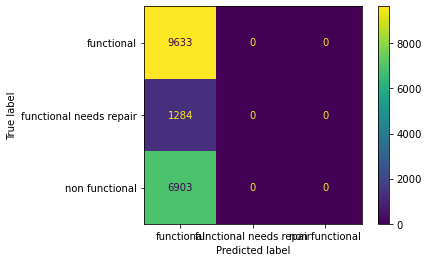

In [30]:
plot_confusion_matrix(dummy, X_test, y_test);

### Logistic Regression

Now moving on to the real model that I plan to use in my analysis. 

In [31]:
logreg_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(max_iter=500))])

logreg_model.fit(X_train, y_train)

logreg_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7453823953823954

In [32]:
logreg_hat = logreg_model.predict(X_test)

In [33]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, logreg_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, logreg_hat, average='micro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, logreg_hat, average='micro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, logreg_hat, average='micro'), 2)}.
""")


Our first model's accuracy on the test set is 0.75. 

Our first model's recall on the test set is 0.75 

Our first model's precision on the test set is 0.75 

Our first model's f1-score on the test is 0.75.



In [34]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, logreg_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, logreg_hat, average='macro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, logreg_hat, average='macro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, logreg_hat, average='macro'), 2)}.
""")


Our first model's accuracy on the test set is 0.75. 

Our first model's recall on the test set is 0.55 

Our first model's precision on the test set is 0.69 

Our first model's f1-score on the test is 0.56.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


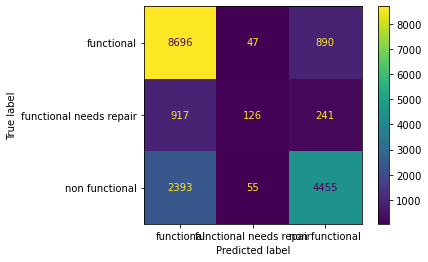

In [35]:
plot_confusion_matrix(logreg_model, X_test, y_test);

### GridSearchCV

Here I'm going to try different iterations of the GridSearchCV. I'm searching each parameter one by one for a good fit, and then hoping to combine them all at the end. Hopefully, I will have a decent end result.

In [36]:
parameters = {'logreg__C': [0.01, 0.80, 0.90, 1.0],
              'logreg__max_iter': [500]}

gs = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [37]:
gs.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
parameters = {'logreg__class_weight': ['balanced', None],
              'logreg__max_iter': [500]}

gs2 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs2.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['elasticnet'],
              'logreg__solver': ['saga'],
              'logreg__l1_ratio': [0.0, 0.10, 0.25],
              'logreg__max_iter': [500]}

gs3 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs3.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['l1'],
              'logreg__solver': ['saga'],
              'logreg__max_iter': [500]}

gs4 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs4.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['none'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs5 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs5.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['l2'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs6 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs6.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
##Comparing all the best parameters and cv score results for each model.
#Choosing the best of each is the most important to fit into the final model
print(f"""
First Gridsearch: {gs.best_params_, gs.cv_results_['mean_test_score']} \n
Second Gridsearch: {gs2.best_params_, gs2.cv_results_['mean_test_score']} \n
Third Gridsearch: {gs3.best_params_, gs3.cv_results_['mean_test_score']} \n
Fourth Gridsearch: {gs4.best_params_, gs4.cv_results_['mean_test_score']} \n
Fifth Gridsearch: {gs5.best_params_, gs5.cv_results_['mean_test_score']} \n
Sixth Gridsearch: {gs6.best_params_, gs6.cv_results_['mean_test_score']}.
""")


First Gridsearch: ({'logreg__C': 1.0, 'logreg__max_iter': 500}, array([0.73686869, 0.74314574, 0.74309764, 0.74316979])) 

Second Gridsearch: ({'logreg__class_weight': None, 'logreg__max_iter': 500}, array([0.63773449, 0.74316979])) 

Third Gridsearch: ({'logreg__l1_ratio': 0.1, 'logreg__max_iter': 500, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}, array([0.74321789, 0.74321789, 0.74321789])) 

Fourth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}, array([0.74316979])) 

Fifth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'none', 'logreg__solver': 'saga'}, array([0.74314574, 0.74312169, 0.74312169, 0.74319384])) 

Sixth Gridsearch: ({'logreg__max_iter': 500, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}, array([0.74316979, 0.74316979, 0.74324194, 0.74321789])).



Now that that's over, I'm ready to combine it all now. 

In [ ]:
gs_model = Pipeline(steps=[('clean', preprocessor), ('logreg', LogisticRegression(penalty= 'l2'\
    , solver= 'sag', C= 1.0, class_weight= None, max_iter= 500, random_state=500))])

gs_model.fit(X_train, y_train)

gs_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7454304954304954

In [ ]:
gs_model.score(X_test, y_test)

0.7449494949494949

In [ ]:
gs_log_hat = gs_model.predict(X_test)

In [ ]:
print(f"""
Our gridsearched model's accuracy on the test set is {round(accuracy_score(y_test, gs_log_hat), 2)}. 
Our gridsearched model's recall on the test set is {round(recall_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's precision on the test set is {round(precision_score(y_test, gs_log_hat, average='macro'), 2)} \n
Our gridsearched model's f1-score on the test is {round(f1_score(y_test, gs_log_hat, average='macro'), 2)}.
""")


Our gridsearched model's accuracy on the test set is 0.74. 
Our gridsearched model's recall on the test set is 0.55 

Our gridsearched model's precision on the test set is 0.69 

Our gridsearched model's f1-score on the test is 0.56.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


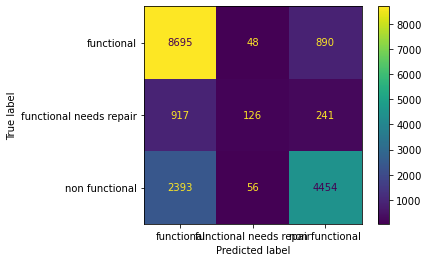

In [ ]:
plot_confusion_matrix(gs_model, X_test, y_test);

### SMOTE

I did notice the target for this dataset is imbalanced. A possible remedy for this is the SMOTE which I shall try here. Fingers crossed

In [ ]:
smote_pipe = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression())])

In [ ]:
smote_pipe.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'population',
                                                   'public_meeting',
                                                   'permit']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                

In [ ]:
smote_pipe.score(X_train, y_train)

0.6383597883597883

In [ ]:
smote_pipe.score(X_test, y_test)

0.6346801346801347

In [ ]:
smote_hat = smote_pipe.predict(X_test)

In [ ]:
print(f"""
Our SMOTE model's accuracy on the test set is {round(accuracy_score(y_test, smote_hat), 2)}. \n
Our SMOTE model's recall on the test set is {round(recall_score(y_test, smote_hat, average='macro'), 2)} \n
Our SMOTE model's precision on the test set is {round(precision_score(y_test, smote_hat, average='macro'), 2)} \n
Our SMOTE model's f1-score on the test is {round(f1_score(y_test, smote_hat, average='macro'), 2)}.
""")


Our SMOTE model's accuracy on the test set is 0.63. 

Our SMOTE model's recall on the test set is 0.64 

Our SMOTE model's precision on the test set is 0.58 

Our SMOTE model's f1-score on the test is 0.56.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


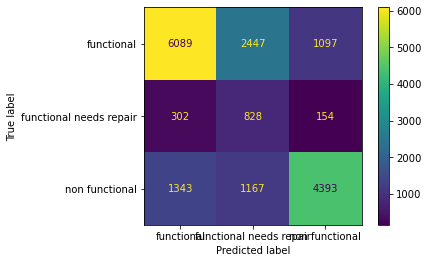

In [ ]:
plot_confusion_matrix(smote_pipe, X_test, y_test);

### GridSearch with SMOTE

Now I'm going to try another GridSearch with my SMOTE train data. This will lead to my final result. 

In [ ]:
#The first C range I ran was [0.001, 0.01, 0.1, 1, 10, 100] and then I decided to rerun again with higher numbers. 
parameters = {'logreg__C': [100, 500, 1000],
              'logreg__max_iter': [500]}

gs_smote = GridSearchCV(estimator=smote_pipe,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__class_weight': ['balanced', None],
              'logreg__max_iter': [500]}

gs_smote2 = GridSearchCV(estimator=smote_pipe,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote2.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['elasticnet'],
              'logreg__solver': ['saga'],
              'logreg__l1_ratio': [0.0, 0.10, 0.25],
              'logreg__max_iter': [500]}

gs_smote3 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote3.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['none'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs_smote4 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote4.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['l1'],
              'logreg__solver': ['saga'],
              'logreg__max_iter': [500]}

gs_smote5 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote5.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
parameters = {'logreg__penalty': ['l2'],
              'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'logreg__max_iter': [500]}

gs_smote6 = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
gs_smote6.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
##Comparing all the best parameters and cv score results for each model.
#Choosing the best of each is the most important to fit into the final model
print(f"""
First SMOTE Gridsearch: {gs_smote.best_params_, gs_smote.cv_results_['mean_test_score']} \n
Second SMOTE Gridsearch: {gs_smote2.best_params_, gs_smote2.cv_results_['mean_test_score']} \n
Third SMOTE Gridsearch: {gs_smote3.best_params_, gs_smote3.cv_results_['mean_test_score']} \n
Fourth SMOTE Gridsearch: {gs_smote4.best_params_, gs_smote4.cv_results_['mean_test_score']} \n
Fifth SMOTE Gridsearch: {gs_smote5.best_params_, gs_smote5.cv_results_['mean_test_score']} \n
Sixth SMOTE Gridsearch: {gs_smote6.best_params_, gs_smote6.cv_results_['mean_test_score']}.
""")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
smote_model = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', C=500))])

smote_model.fit(X_train, y_train)

smote_model.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6444444444444445

In [ ]:
smote_model.score(X_test, y_test)

0.6394500561167228

In [ ]:
smote_model2 = ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', class_weight= 'balanced'))])

smote_model2.fit(X_train, y_train)

smote_model2.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6391053391053391

In [ ]:
smote_model2.score(X_test, y_test)

0.636026936026936

In [ ]:
smote_model3= ImPipeline(steps=[('clean', preprocessor),
                               ('sm', SMOTE()),
                               ('logreg', LogisticRegression(max_iter= 500, solver= 'sag', penalty= 'l2', class_weight= 'balanced', C= 500))])

smote_model3.fit(X_train, y_train)

smote_model3.score(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.642977392977393

In [ ]:
smote_model3.score(X_test, y_test)

0.6373737373737374

### Final Model

Here I am wrapping it all up and going to visualize my final result.

In [ ]:
#Checking the C range once again before calling it quits 
parameters = {'logreg__C': [1],
              ,
              'logreg__penalty': ['l2'],
              'logreg__solver': ['sag'],
              'logreg__max_iter': [500]}

final_smote = GridSearchCV(estimator=logreg_model,
                 param_grid=parameters,
                 cv=5, error_score= 'raise')

In [ ]:
final_smote.fit(X_train, y_train)

C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\deaud\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['gps_height',
                                                                          'population',
                                                                          'public_meeting',
  

In [ ]:
print(final_smote.best_params_, final_smote.cv_results_['mean_test_score'])

{'logreg__C': 1, 'logreg__class_weight': 'balanced', 'logreg__max_iter': 500, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'} [0.63744589]


In [ ]:
final_smote.score(X_train, y_train)

0.7454304954304954

In [ ]:
final_smote.score(X_test, y_test)

0.7449494949494949

In [ ]:
smote_hat2 = final_smote.predict(X_test)

In [ ]:
print(f"""
Our final SMOTE model's accuracy on the test set is {round(accuracy_score(y_test, smote_hat2), 4)}. \n
Our final SMOTE model's recall on the test set is {round(recall_score(y_test, smote_hat2, average='weighted'), 4)} \n
Our final SMOTE model's precision on the test set is {round(precision_score(y_test, smote_hat2, average='weighted'), 4)} \n
Our final SMOTE model's f1-score on the test is {round(f1_score(y_test, smote_hat2, average='weighted'), 4)}.
""")


Our final SMOTE model's accuracy on the test set is 0.7449. 

Our final SMOTE model's recall on the test set is 0.7449 

Our final SMOTE model's precision on the test set is 0.7399 

Our final SMOTE model's f1-score on the test is 0.7228.



C:\Users\deaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


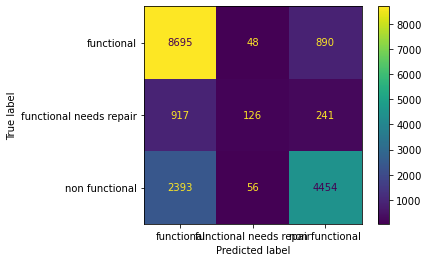

In [ ]:
plot_confusion_matrix(final_smote, X_test, y_test);